# Tensorflow

In [24]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


## 데이터 준비

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 데이터 전처리

In [29]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

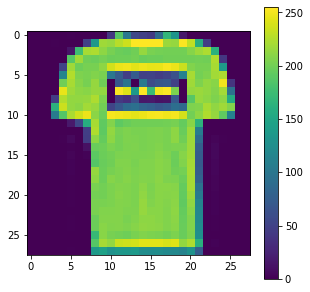

In [30]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

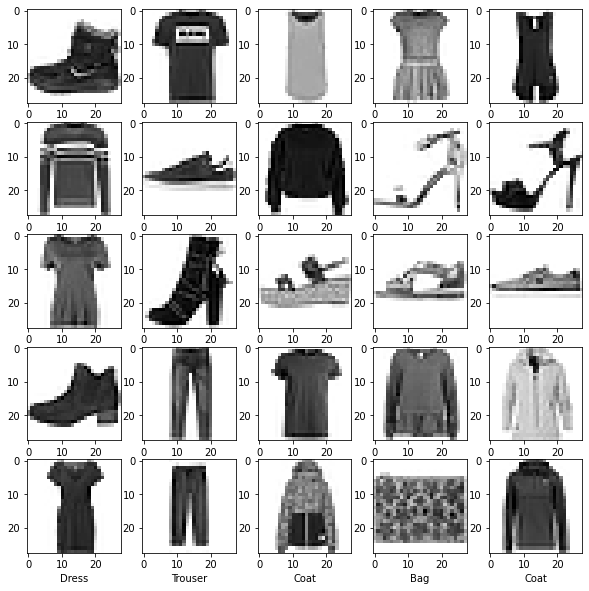

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

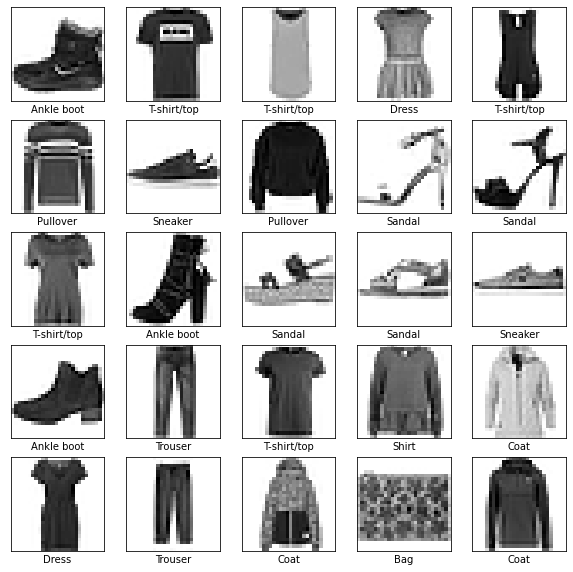

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델구성

In [33]:
# 층결정 (층을 구성한 다음 모델을 컴파일 해야 함)

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),       #2차원 배열(28,28)의 이미지 포맷을 28*28=784 픽셀의 1차원배열로 변환
                          keras.layers.Dense(128, activation=tf.nn.relu),  # 128개의 노드(뉴런)
                          keras.layers.Dense(10, activation=tf.nn.softmax) # 10개의 노드의 소프트맥스층(10개의 확률은 반환하고 반환된 값은 전체 합의 1이 됨)
                                                                           # 각 노드는 현재 이미지가 10개 클리스 중 하나의 속할 확률을 출력
])

In [34]:
# 모델 컴파일

# 손실 함수(loss function) - 훈련하는 동안 모델의 오차를 측정. 모델의 학습이 올바른 방향으로 향하도록 이 함수 값을 최소화 해야 함
# 옵티마이저(optimizer) - 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정
# 지표(metrics) - 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# 모델 훈련 (훈련데이터를 모델에 주입, 모델이 이미지와 레이블을 맵핑하는 방법, 테스트 세트에 대한 모델의 예측)

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.9988 - accuracy: 0.6804
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6780 - accuracy: 0.7558
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5825 - accuracy: 0.8002
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5436 - accuracy: 0.8146
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5210 - accuracy: 0.8194


In [36]:
# 정확도 평가

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.6133 - accuracy: 0.7928


## 예측

In [37]:
# 훈련된 모델을 사용하여 실제 모델이 어떻게 예측하는지 test_images로 확인

predictions = model.predict(test_images)
predictions[0]

array([3.3979698e-19, 6.6169264e-22, 1.7944877e-27, 1.5484149e-20,
       3.2951804e-29, 5.8734339e-02, 1.6739845e-15, 9.1684751e-02,
       1.5725216e-14, 8.4958088e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

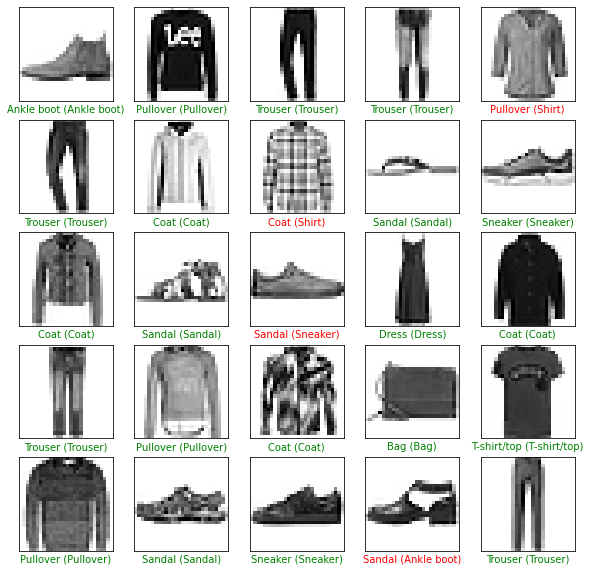

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid('off')
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i], cmap=plt.cm.binary)    # predictions에서 가장 큰 값을 predicted_label로 가져온다
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = "green"
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
             color=color)

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)               # predictions에서 가장 큰 값을 predicted_label로 가져온다

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:                
    color = 'blue'                                   # 실제 test_label과 일치하면 파랑색 글씨로
  else:
    color = 'red'                                    # 일치하지 않으면 빨강색

  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
             color=color)
      

In [46]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

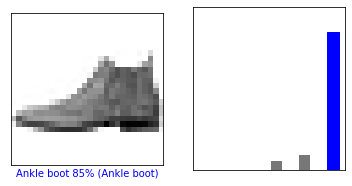

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

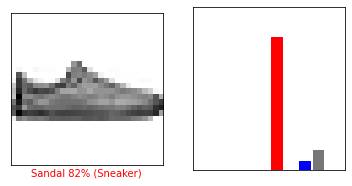

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

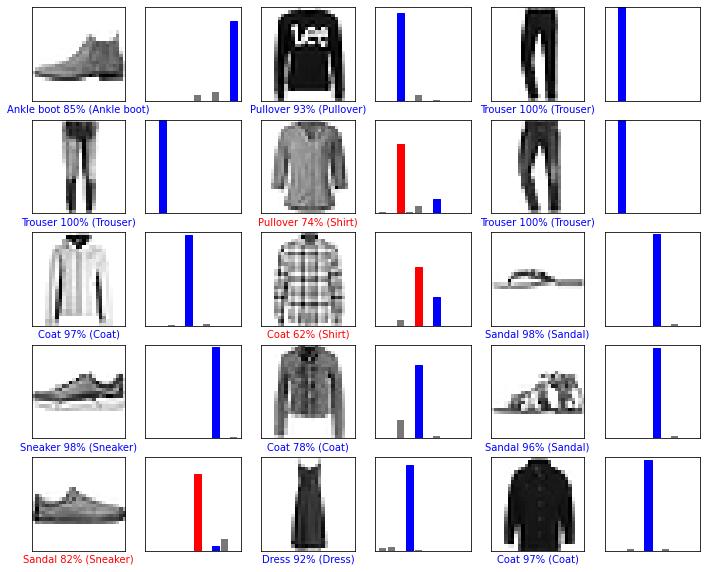

In [50]:
# 처음 x개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [52]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[0]
print(img.shape)

(28, 28)


In [53]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.3979690e-19 6.6169249e-22 1.7944806e-27 1.5484086e-20 3.2951798e-29
  5.8734547e-02 1.6739841e-15 9.1684736e-02 1.5725214e-14 8.4958071e-01]]


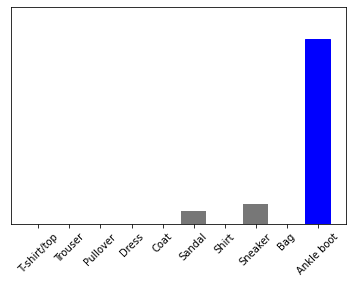

In [56]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()